In [4]:
from app.process_data.ProcessData import ProcessData

In [5]:
process_data = ProcessData()

uint8 (960, 1224, 3) (8, 255)


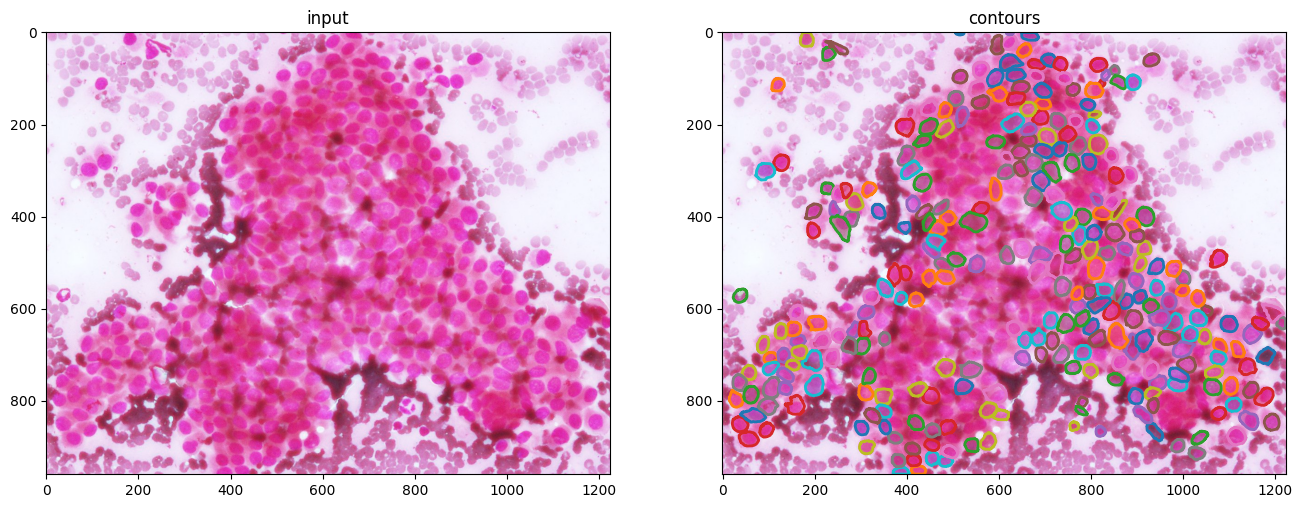

In [1]:
import torch, cv2, celldetection as cd
from matplotlib import pyplot as plt
# Load pretrained model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = cd.fetch_model('ginoro_CpnResNeXt101UNet-fbe875f1a3e5ce2c', check_hash=True).to(device)
model.eval()
# Load input
img = cv2.imread('/mnt/DataK/Project/ThyroidCancer/data/origin_data/B256/B6/Image_26389.jpg')
print(img.dtype, img.shape, (img.min(), img.max()))
# Run model
with torch.no_grad():
    x = cd.to_tensor(img, transpose=True, device=device, dtype=torch.float32)
    x = x / 255  # ensure 0..1 range
    x = x[None]  # add batch dimension: Tensor[3, h, w] -> Tensor[1, 3, h, w]
    y = model(x)
# Show results for each batch item
contours = y['contours']
for n in range(len(x)):
    cd.imshow_row(x[n], x[n], figsize=(16, 9), titles=('input', 'contours'))
    cd.plot_contours(contours[n])
    plt.show()